borrow power from ChatGPT and draw graphs similar to those from other's essay 

Pictrue 1: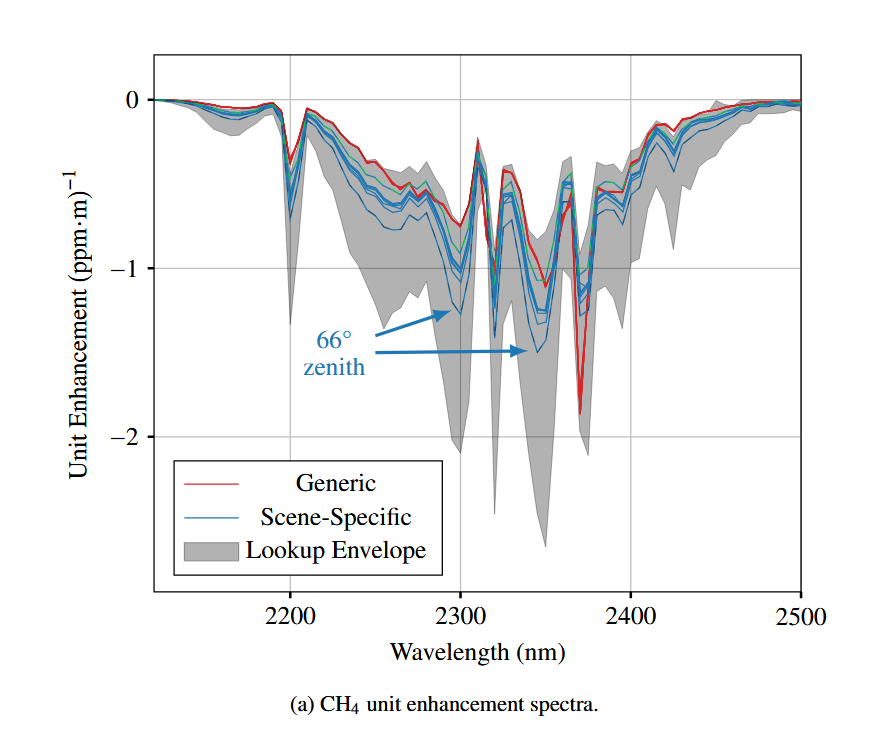

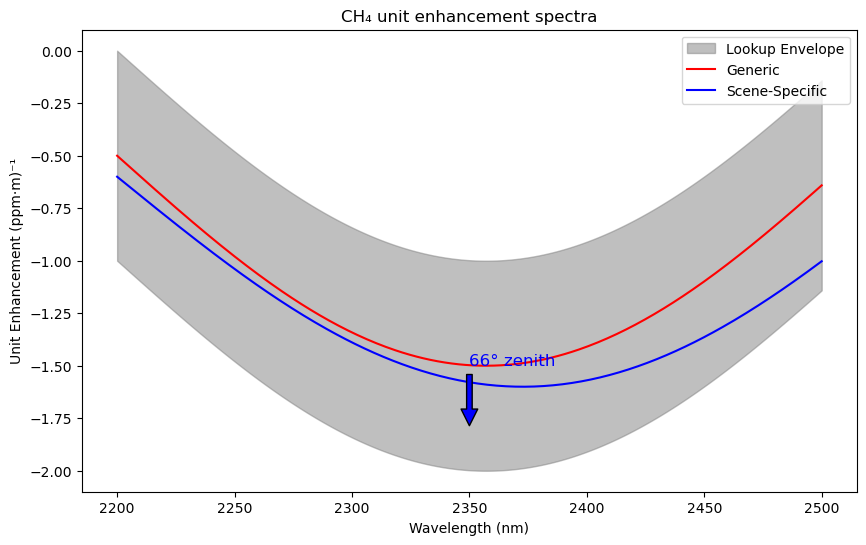

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟数据
wavelength = np.linspace(2200, 2500, 300)
generic = -1 * np.sin((wavelength - 2200) / 100) - 0.5
scene_specific = -1 * np.sin((wavelength - 2200) / 110) - 0.6
lookup_envelope_lower = generic - 0.5
lookup_envelope_upper = generic + 0.5

# 绘制图表
plt.figure(figsize=(10, 6))

# 绘制包络线
plt.fill_between(wavelength, lookup_envelope_lower, lookup_envelope_upper, color='grey', alpha=0.5, label='Lookup Envelope')

# 绘制通用和特定场景数据
plt.plot(wavelength, generic, label='Generic', color='red')
plt.plot(wavelength, scene_specific, label='Scene-Specific', color='blue')

# it's not necessary since you can add it after the plot is created
# plt.annotate('66° zenith', xy=(2350, -1.8), xytext=(2350, -1.5),
#              arrowprops=dict(facecolor='blue', shrink=0.05),
#              fontsize=12, color='blue')

# 设置标签和标题
plt.xlabel('Wavelength (nm)')
plt.ylabel('Unit Enhancement (ppm⋅m)⁻¹')
plt.title('CH₄ unit enhancement spectra')

# 添加图例
plt.legend()

# 显示图表
plt.show()


Picture2: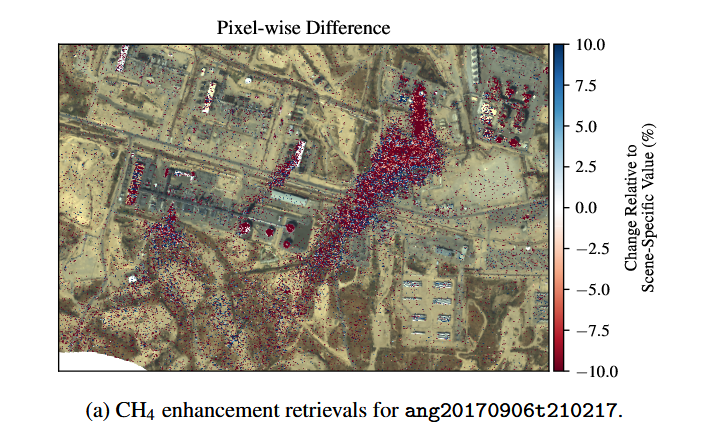



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import geopandas as gpd
from matplotlib.colors import Normalize
import seaborn as sns

# 读取地理数据（这里假设有一个GeoDataFrame，其中包含了CH4的数据）
# gdf = gpd.read_file('your_geodata_file.geojson')

# 模拟数据（需要用真实数据替换）
np.random.seed(42)
lat = np.random.uniform(low=34.0, high=34.2, size=1000)
lon = np.random.uniform(low=-118.5, high=-118.3, size=1000)
diff = np.random.uniform(low=-10, high=10, size=1000)

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame({'latitude': lat, 'longitude': lon, 'difference': diff})
gdf['geometry'] = gpd.points_from_xy(gdf.longitude, gdf.latitude)

# 设置绘图范围
extent = [-118.5, -118.3, 34.0, 34.2]

# 创建背景地图
stamen_terrain = cimgt.Stamen('terrain-background')

# 绘制图像
fig, ax = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent(extent)
ax.add_image(stamen_terrain, 10)

# 规范化颜色映射
norm = Normalize(vmin=-10, vmax=10)

# 绘制数据点
sc = ax.scatter(gdf['longitude'], gdf['latitude'], c=gdf['difference'], cmap='RdBu', norm=norm, s=10, transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Change Relative to Scene-Specific Value (%)')

# 添加标题
plt.title('Pixel-wise Difference')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图像
plt.show()


C:\Users\RS\AppData\Local\Temp\ipykernel_30028\862564962.py:20: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf['geometry'] = gpd.points_from_xy(gdf.longitude, gdf.latitude)
c:\Users\RS\.conda\envs\matchedfiltermethod\Lib\site-packages\cartopy\io\img_tiles.py:414: UserWarning: The Stamen styles are no longer served by Stamen and are now served by Stadia Maps. Please use the StadiaMapsTiles class instead.
  warnings.warn("The Stamen styles are no longer served by Stamen and "


HTTP Error 502: Bad Gateway
HTTP Error 502: Bad Gateway
HTTP Error 502: Bad Gateway
HTTP Error 502: Bad Gateway


KeyboardInterrupt: 

picture3: 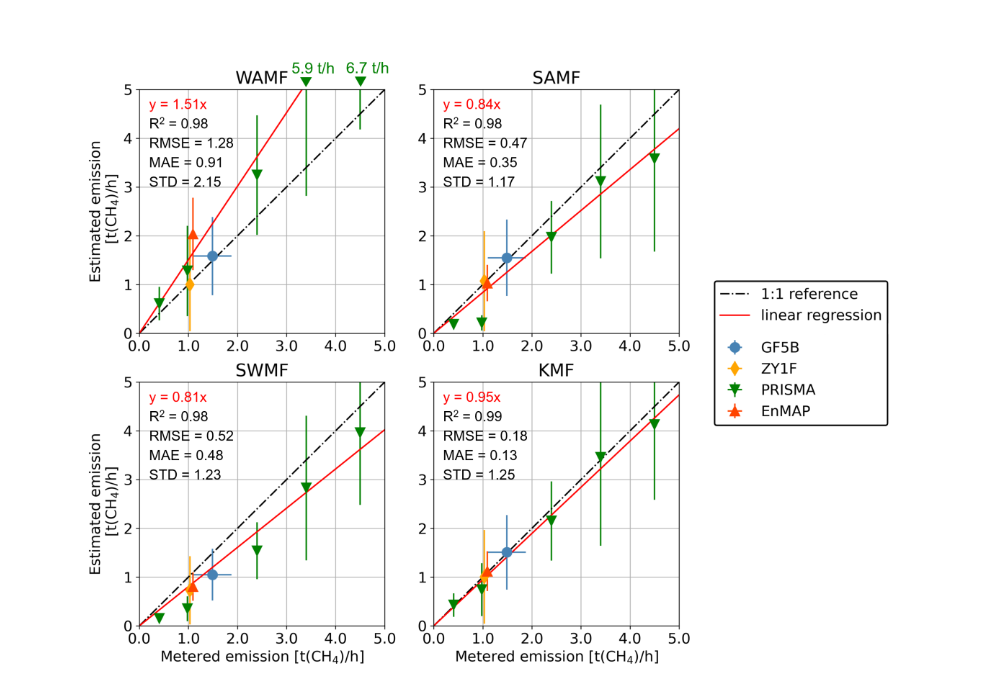

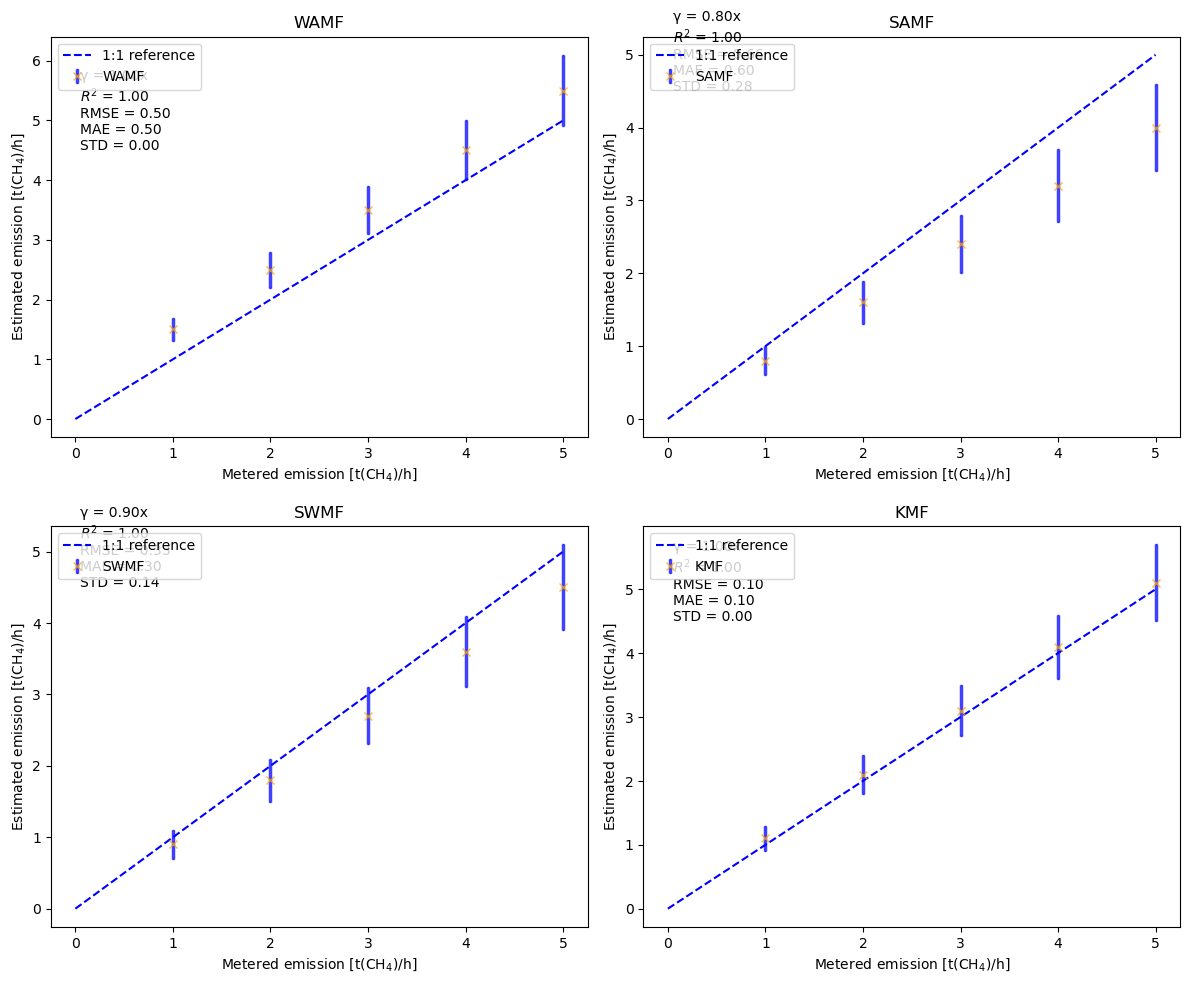

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,root_mean_squared_error

# Dummy data for demonstration purposes
metered_emission = np.array([1, 2, 3, 4, 5])
estimated_emission_WAMF = np.array([1.5, 2.5, 3.5, 4.5, 5.5])
estimated_emission_SAMF = np.array([0.8, 1.6, 2.4, 3.2, 4.0])
estimated_emission_SWMF = np.array([0.9, 1.8, 2.7, 3.6, 4.5])
estimated_emission_KMF = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
errors = np.array([0.2, 0.3, 0.4, 0.5, 0.6])

datasets = {
    'WAMF': estimated_emission_WAMF,
    'SAMF': estimated_emission_SAMF,
    'SWMF': estimated_emission_SWMF,
    'KMF': estimated_emission_KMF
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (key, estimated_emission) in zip(axes, datasets.items()):
    # Plotting data points with error bars d 菱形 ^ 三角 v 倒三角 o 圆形 s 正方形 p 五角星 * 星号 x x号
    ax.errorbar(metered_emission, estimated_emission, yerr=errors, fmt='x', color='orange',  ecolor='blue', 
                elinewidth=2.5, capsize=1, alpha=0.75,label=key)
    
    # 1:1 reference line
    ax.plot([0, 5], [0, 5], 'b--', label='1:1 reference')
    
    # Linear regression
    reg = LinearRegression().fit(metered_emission.reshape(-1, 1), estimated_emission)
    predicted = reg.predict(metered_emission.reshape(-1, 1))
    
    ax.plot(metered_emission, predicted, 'r-', label='linear regression')
    
    # Calculate metrics
    r2 = reg.score(metered_emission.reshape(-1, 1), estimated_emission)
    rmse = root_mean_squared_error(metered_emission, estimated_emission)
    mae = mean_absolute_error(metered_emission, estimated_emission)
    std = np.std(estimated_emission - metered_emission)
    
    # Adding text annotations
    ax.text(0.05, 4.5, f'γ = {reg.coef_[0]:.2f}x\n$R^2$ = {r2:.2f}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}\nSTD = {std:.2f}')
    
    # Adding labels and title
    ax.set_xlabel('Metered emission [t(CH$_4$)/h]')
    ax.set_ylabel('Estimated emission [t(CH$_4$)/h]')
    ax.set_title(key)
    
    # Adding legend
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


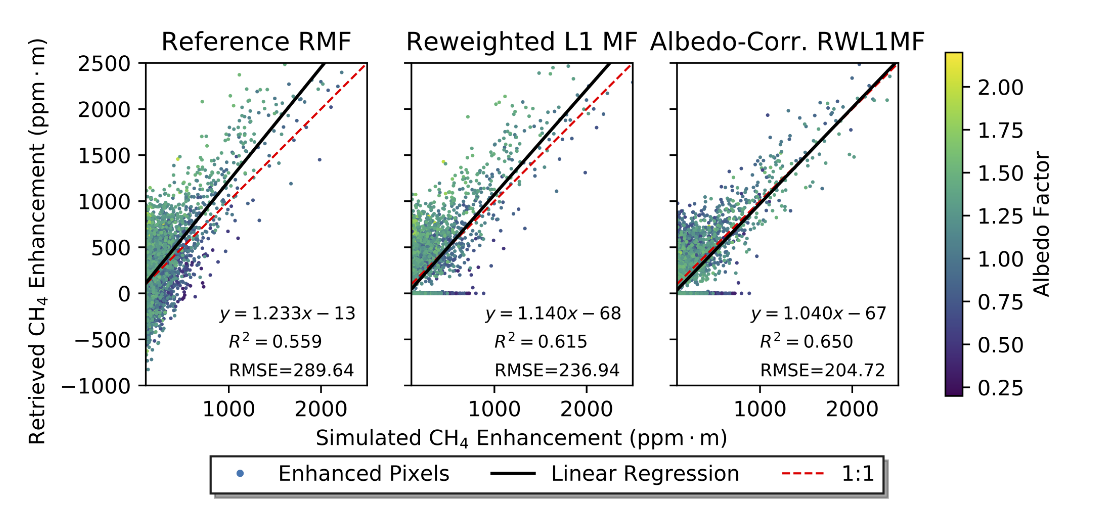

C:\Users\RS\AppData\Local\Temp\ipykernel_41252\1061081972.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


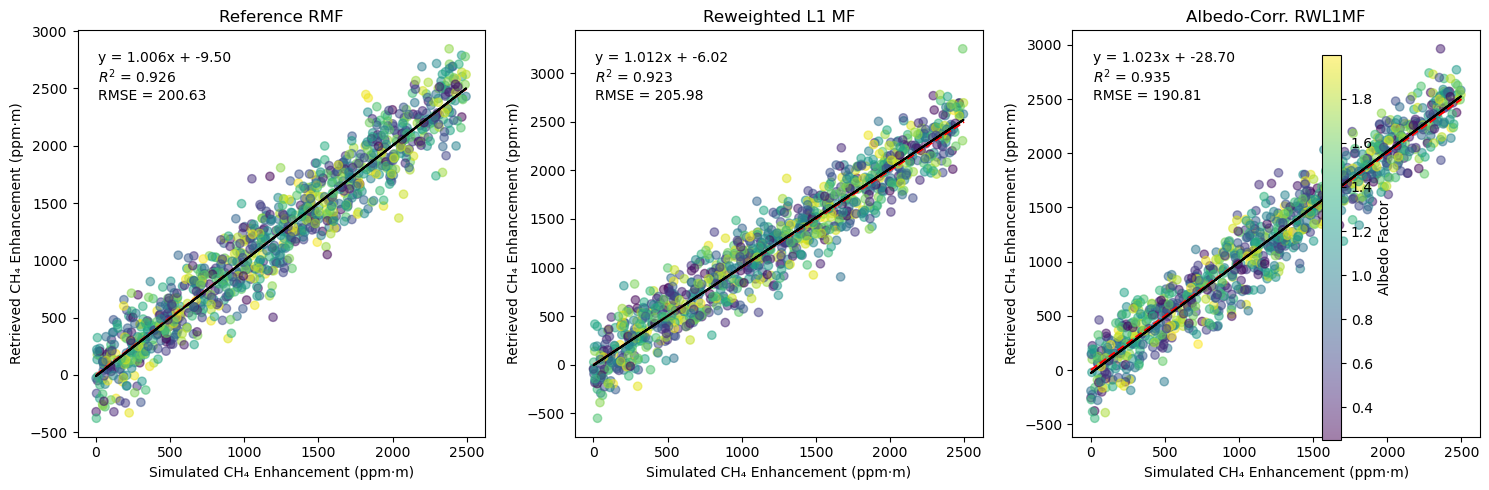

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Simulate some data (replace with your actual data)
simulated_enhancement = np.random.uniform(0, 2500, 1000)
retrieved_enhancement = [simulated_enhancement + np.random.normal(0, 200, 1000) for _ in range(3)]
albedo_factor = np.random.uniform(0.25, 2.0, 1000)

# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each model (3 subplots)
for i, ax in enumerate(axes):
    # Scatter plot with color mapping (albedo factor)
    sc = ax.scatter(simulated_enhancement, retrieved_enhancement[i], 
                    c=albedo_factor, cmap='viridis', alpha=0.5)
    
    # 1:1 reference line
    ax.plot([0, 2500], [0, 2500], 'r--', label='1:1 reference')
    
    # Linear regression fit
    model = LinearRegression()
    model.fit(simulated_enhancement.reshape(-1, 1), retrieved_enhancement[i])
    predicted = model.predict(simulated_enhancement.reshape(-1, 1))
    ax.plot(simulated_enhancement, predicted, 'k-', label="Linear Regression")
    
    # Calculate R² and RMSE
    r_squared = model.score(simulated_enhancement.reshape(-1, 1), retrieved_enhancement[i])
    rmse = np.sqrt(mean_squared_error(retrieved_enhancement[i], predicted))
    
    # Add text with equation, R², and RMSE
    ax.text(0.05, 0.95, f'y = {model.coef_[0]:.3f}x + {model.intercept_:.2f}\n'
                        f'$R^2$ = {r_squared:.3f}\n'
                        f'RMSE = {rmse:.2f}', 
            transform=ax.transAxes, verticalalignment='top')
    
    # Set labels and title
    ax.set_xlabel("Simulated CH₄ Enhancement (ppm·m)")
    ax.set_ylabel("Retrieved CH₄ Enhancement (ppm·m)")
    titles = ["Reference RMF", "Reweighted L1 MF", "Albedo-Corr. RWL1MF"]
    ax.set_title(titles[i])

# Add a colorbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label("Albedo Factor")

# Final layout adjustments
plt.tight_layout()
plt.show()
